# Neural Network Models for MGNREGA Wage Prediction (Scikit-Learn)

## ✅ No TensorFlow Required - Works on Windows Python 3.11

This notebook implements neural networks using **scikit-learn's MLPRegressor** which doesn't have DLL dependencies.

## Models Covered:
1. **MLPRegressor (Multi-Layer Perceptron)** - Simple Neural Network
2. **Deep MLPRegressor** - Multiple hidden layers
3. **Optimized MLPRegressor** - With hyperparameter tuning
4. **Comparison with Traditional ML Models**

## Why Scikit-Learn for Neural Networks?
- ✅ No complex dependencies (no CUDA, no DLL issues)
- ✅ Easy to use and understand
- ✅ Built-in cross-validation
- ✅ Perfect for tabular data like MGNREGA
- ✅ Works seamlessly on Windows

In [1]:
# Import necessary libraries (all standard, no TensorFlow!)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Neural Network from scikit-learn
from sklearn.neural_network import MLPRegressor

# For comparison
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)

print("✅ All libraries loaded successfully!")
print("✅ No TensorFlow required - Pure Python solution!")

✅ All libraries loaded successfully!
✅ No TensorFlow required - Pure Python solution!


## Step 1: Load and Prepare the Data

In [2]:
# Load the dataset
# IMPORTANT: Replace the path below with your actual CSV file path
df = pd.read_csv('..\\data\\combined.csv')  # Update this path!

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

# Check for missing values
print(f"\nMissing values:\n{df.isnull().sum().sum()} total missing values")

Dataset shape: (9612, 36)

First few rows:
    fin_year  month  state_code   state_name  district_code district_name  \
0  2023-2024  March          18  MAHARASHTRA           1804     RATNAGIRI   
1  2023-2024  March          18  MAHARASHTRA           1807         DHULE   
2  2023-2024  March          18  MAHARASHTRA           1809    AHMEDNAGAR   
3  2023-2024  March          18  MAHARASHTRA           1817      PARBHANI   
4  2023-2024  March          18  MAHARASHTRA           1820     Dharashiv   

   Approved_Labour_Budget  Average_Wage_rate_per_day_per_person  \
0                  534483                            298.402239   
1                 1329507                            311.223189   
2                 2247080                            321.932569   
3                 4450591                            322.118343   
4                 1605784                            303.088948   

   Average_days_of_employment_provided_per_Household  \
0                                  

In [3]:
# Feature Selection - Using features from your regression analysis
feature_columns = [
    'Total_Exp',
    'Approved_Labour_Budget',
    'Women_Persondays',
    'Persondays_of_Central_Liability_so_far',
    'Total_Households_Worked',
    'Total_Individuals_Worked',
    'Number_of_Completed_Works',
    'Number_of_Ongoing_Works',
    'SC_persondays',
    'ST_persondays'
]

target_column = 'Wages'

# Create feature matrix X and target vector y
X = df[feature_columns].copy()
y = df[target_column].copy()

# Handle missing values
X = X.fillna(X.median())
y = y.fillna(y.median())

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeatures used: {list(X.columns)}")

Feature matrix shape: (9612, 10)
Target vector shape: (9612,)

Features used: ['Total_Exp', 'Approved_Labour_Budget', 'Women_Persondays', 'Persondays_of_Central_Liability_so_far', 'Total_Households_Worked', 'Total_Individuals_Worked', 'Number_of_Completed_Works', 'Number_of_Ongoing_Works', 'SC_persondays', 'ST_persondays']


## Step 2: Train-Test Split and Standardization

In [4]:
# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Standardize features (critical for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeature statistics after scaling:")
print(f"Mean: {X_train_scaled.mean():.6f} (should be ~0)")
print(f"Std: {X_train_scaled.std():.6f} (should be ~1)")

Training set size: 7689 samples
Test set size: 1923 samples

Feature statistics after scaling:
Mean: -0.000000 (should be ~0)
Std: 1.000000 (should be ~1)


## Model 1: Simple Neural Network (Baseline)

Architecture: Single hidden layer with 100 neurons
- Input Layer: 10 features
- Hidden Layer 1: 100 neurons, ReLU activation
- Output Layer: 1 neuron (wage prediction)

In [5]:
print("="*60)
print("Training Simple Neural Network (1 hidden layer)...")
print("="*60)

# Simple MLP with one hidden layer
mlp_simple = MLPRegressor(
    hidden_layer_sizes=(100,),  # One hidden layer with 100 neurons
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2,
    verbose=True
)

# Train the model
mlp_simple.fit(X_train_scaled, y_train)

# Predictions
y_pred_simple = mlp_simple.predict(X_test_scaled)

# Evaluate
mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("\n" + "="*60)
print("Simple Neural Network - Test Results")
print("="*60)
print(f"MSE:      {mse_simple:,.2f}")
print(f"RMSE:     {rmse_simple:,.2f}")
print(f"MAE:      {mae_simple:,.2f}")
print(f"R² Score: {r2_simple:.4f}")
print(f"Training iterations: {mlp_simple.n_iter_}")
print("="*60)

Training Simple Neural Network (1 hidden layer)...
Iteration 1, loss = 44840363.34850230
Validation score: -1.013594
Iteration 2, loss = 44817613.99710755
Validation score: -1.012306
Iteration 3, loss = 44782574.56070545
Validation score: -1.010359
Iteration 4, loss = 44731195.16626000
Validation score: -1.007694
Iteration 5, loss = 44663357.91082060
Validation score: -1.004210
Iteration 6, loss = 44578440.58233961
Validation score: -0.999931
Iteration 7, loss = 44475461.57686115
Validation score: -0.994896
Iteration 8, loss = 44354986.15769362
Validation score: -0.988950
Iteration 9, loss = 44214492.18934245
Validation score: -0.982237
Iteration 10, loss = 44054734.49358585
Validation score: -0.974663
Iteration 11, loss = 43876441.10377235
Validation score: -0.966211
Iteration 12, loss = 43678583.32204190
Validation score: -0.956772
Iteration 13, loss = 43459413.10642340
Validation score: -0.946512
Iteration 14, loss = 43222989.66253898
Validation score: -0.935418
Iteration 15, loss =

## Model 2: Deep Neural Network (3 Hidden Layers)

Architecture: Three hidden layers
- Input Layer: 10 features
- Hidden Layer 1: 128 neurons, ReLU activation
- Hidden Layer 2: 64 neurons, ReLU activation
- Hidden Layer 3: 32 neurons, ReLU activation
- Output Layer: 1 neuron (wage prediction)

In [6]:
print("\n" + "="*60)
print("Training Deep Neural Network (3 hidden layers)...")
print("="*60)

# Deep MLP with three hidden layers
mlp_deep = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),  # Three layers: 128 → 64 → 32
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2,
    verbose=True
)

# Train the model
mlp_deep.fit(X_train_scaled, y_train)

# Predictions
y_pred_deep = mlp_deep.predict(X_test_scaled)

# Evaluate
mse_deep = mean_squared_error(y_test, y_pred_deep)
rmse_deep = np.sqrt(mse_deep)
mae_deep = mean_absolute_error(y_test, y_pred_deep)
r2_deep = r2_score(y_test, y_pred_deep)

print("\n" + "="*60)
print("Deep Neural Network - Test Results")
print("="*60)
print(f"MSE:      {mse_deep:,.2f}")
print(f"RMSE:     {rmse_deep:,.2f}")
print(f"MAE:      {mae_deep:,.2f}")
print(f"R² Score: {r2_deep:.4f}")
print(f"Training iterations: {mlp_deep.n_iter_}")
print("="*60)


Training Deep Neural Network (3 hidden layers)...
Iteration 1, loss = 45372740.13465378
Validation score: -0.986411
Iteration 2, loss = 45264955.93891498
Validation score: -0.974796
Iteration 3, loss = 44525555.96865546
Validation score: -0.906634
Iteration 4, loss = 41283428.81205944
Validation score: -0.657340
Iteration 5, loss = 32068762.77898337
Validation score: -0.096074
Iteration 6, loss = 17139471.76499552
Validation score: 0.562491
Iteration 7, loss = 6892227.97029516
Validation score: 0.771008
Iteration 8, loss = 5208862.64865794
Validation score: 0.796897
Iteration 9, loss = 4641171.92524150
Validation score: 0.818048
Iteration 10, loss = 4131635.24471153
Validation score: 0.839839
Iteration 11, loss = 3644419.90565639
Validation score: 0.860288
Iteration 12, loss = 3177893.90569804
Validation score: 0.879400
Iteration 13, loss = 2764032.94948572
Validation score: 0.895987
Iteration 14, loss = 2413009.14344242
Validation score: 0.909757
Iteration 15, loss = 2125278.81991560

## Model 3: Optimized Neural Network

Using GridSearchCV to find the best hyperparameters

In [7]:
print("\n" + "="*60)
print("Training Optimized Neural Network with Grid Search...")
print("This may take a few minutes...")
print("="*60)

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(100,), (128, 64), (100, 50, 25)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

# Create base model
mlp_base = MLPRegressor(
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42,
    early_stopping=True
)

# Grid search
grid_search = GridSearchCV(
    mlp_base,
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Best model
mlp_optimized = grid_search.best_estimator_

print(f"\nBest parameters found:")
print(grid_search.best_params_)

# Predictions
y_pred_optimized = mlp_optimized.predict(X_test_scaled)

# Evaluate
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("\n" + "="*60)
print("Optimized Neural Network - Test Results")
print("="*60)
print(f"MSE:      {mse_optimized:,.2f}")
print(f"RMSE:     {rmse_optimized:,.2f}")
print(f"MAE:      {mae_optimized:,.2f}")
print(f"R² Score: {r2_optimized:.4f}")
print("="*60)


Training Optimized Neural Network with Grid Search...
This may take a few minutes...
Fitting 3 folds for each of 18 candidates, totalling 54 fits

Best parameters found:
{'alpha': 0.001, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate_init': 0.01}

Optimized Neural Network - Test Results
MSE:      325,743.47
RMSE:     570.74
MAE:      347.20
R² Score: 0.9933


## Comparison with Traditional ML Models

Let's compare neural networks with other algorithms

In [8]:
print("\n" + "="*60)
print("Training Traditional ML Models for Comparison...")
print("="*60)

# Random Forest
print("\nTraining Random Forest...")
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest - R² Score: {r2_rf:.4f}")

# Gradient Boosting
print("\nTraining Gradient Boosting...")
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f"Gradient Boosting - R² Score: {r2_gb:.4f}")

# Ridge Regression
print("\nTraining Ridge Regression...")
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"Ridge Regression - R² Score: {r2_ridge:.4f}")

print("\n✅ All models trained successfully!")


Training Traditional ML Models for Comparison...

Training Random Forest...
Random Forest - R² Score: 0.9989

Training Gradient Boosting...
Gradient Boosting - R² Score: 0.9970

Training Ridge Regression...
Ridge Regression - R² Score: 0.9834

✅ All models trained successfully!


## Model Comparison and Visualization

In [9]:
# Create comprehensive comparison dataframe
results_df = pd.DataFrame({
    'Model': [
        'Simple NN (1 layer)',
        'Deep NN (3 layers)',
        'Optimized NN',
        'Random Forest',
        'Gradient Boosting',
        'Ridge Regression'
    ],
    'RMSE': [
        rmse_simple, rmse_deep, rmse_optimized,
        rmse_rf, rmse_gb, rmse_ridge
    ],
    'MAE': [
        mae_simple, mae_deep, mae_optimized,
        mae_rf, mae_gb, mae_ridge
    ],
    'R² Score': [
        r2_simple, r2_deep, r2_optimized,
        r2_rf, r2_gb, r2_ridge
    ],
    'Type': [
        'Neural Network', 'Neural Network', 'Neural Network',
        'Traditional ML', 'Traditional ML', 'Traditional ML'
    ]
})

# Sort by R² Score
results_df = results_df.sort_values('R² Score', ascending=False).reset_index(drop=True)

print("\n" + "="*80)
print("COMPLETE MODEL COMPARISON - NEURAL NETWORKS vs TRADITIONAL ML")
print("="*80)
print(results_df.to_string(index=False))
print("="*80)

# Find best model
best_model_name = results_df.loc[0, 'Model']
best_r2 = results_df.loc[0, 'R² Score']
best_rmse = results_df.loc[0, 'RMSE']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   R² Score: {best_r2:.4f}")
print(f"   RMSE: {best_rmse:,.2f}")


COMPLETE MODEL COMPARISON - NEURAL NETWORKS vs TRADITIONAL ML
              Model       RMSE        MAE  R² Score           Type
      Random Forest 226.673474  67.064860  0.998943 Traditional ML
  Gradient Boosting 381.372923 232.194111  0.997008 Traditional ML
       Optimized NN 570.739410 347.201363  0.993300 Neural Network
 Deep NN (3 layers) 606.413118 338.598749  0.992436 Neural Network
Simple NN (1 layer) 884.131305 600.480222  0.983922 Neural Network
   Ridge Regression 899.702669 543.759092  0.983351 Traditional ML

🏆 BEST MODEL: Random Forest
   R² Score: 0.9989
   RMSE: 226.67


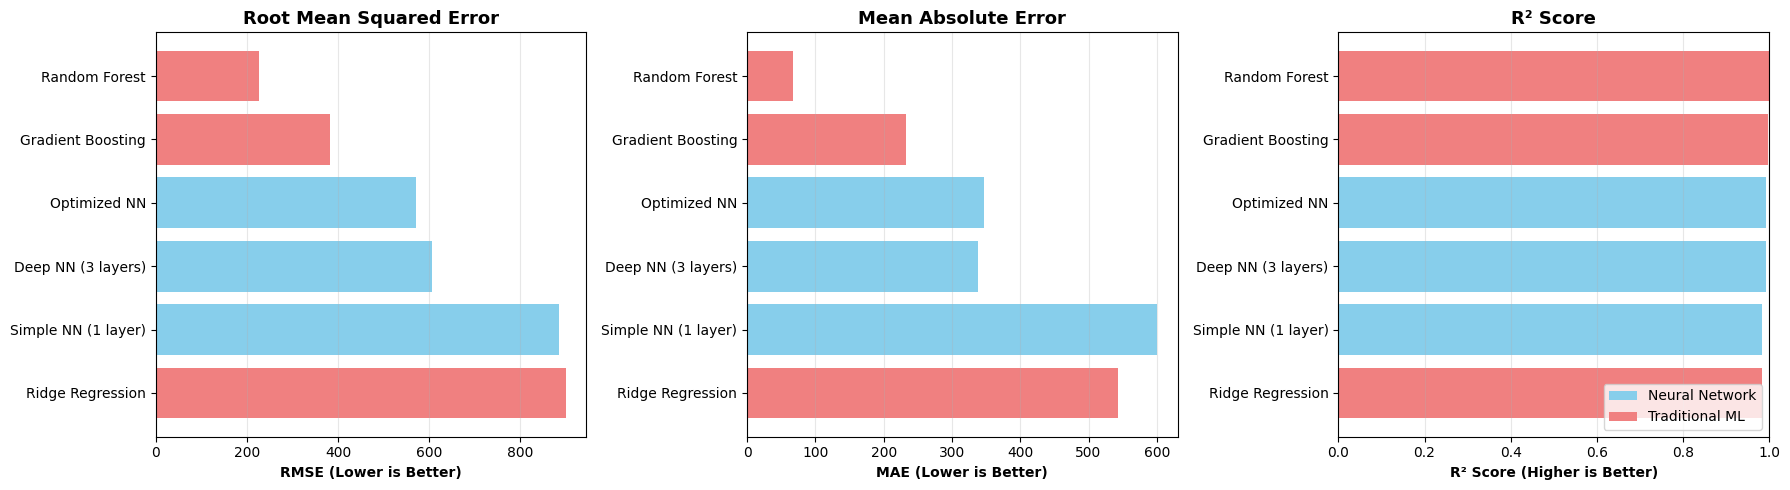

In [10]:
# Visualization 1: Model Comparison Bar Charts
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Color mapping
colors = ['skyblue' if t == 'Neural Network' else 'lightcoral' 
          for t in results_df['Type']]

# RMSE Comparison
axes[0].barh(results_df['Model'], results_df['RMSE'], color=colors)
axes[0].set_xlabel('RMSE (Lower is Better)', fontweight='bold')
axes[0].set_title('Root Mean Squared Error', fontsize=13, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

# MAE Comparison
axes[1].barh(results_df['Model'], results_df['MAE'], color=colors)
axes[1].set_xlabel('MAE (Lower is Better)', fontweight='bold')
axes[1].set_title('Mean Absolute Error', fontsize=13, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

# R² Score Comparison
axes[2].barh(results_df['Model'], results_df['R² Score'], color=colors)
axes[2].set_xlabel('R² Score (Higher is Better)', fontweight='bold')
axes[2].set_title('R² Score', fontsize=13, fontweight='bold')
axes[2].set_xlim([0, 1])
axes[2].grid(axis='x', alpha=0.3)
axes[2].invert_yaxis()

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='skyblue', label='Neural Network'),
    Patch(facecolor='lightcoral', label='Traditional ML')
]
axes[2].legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

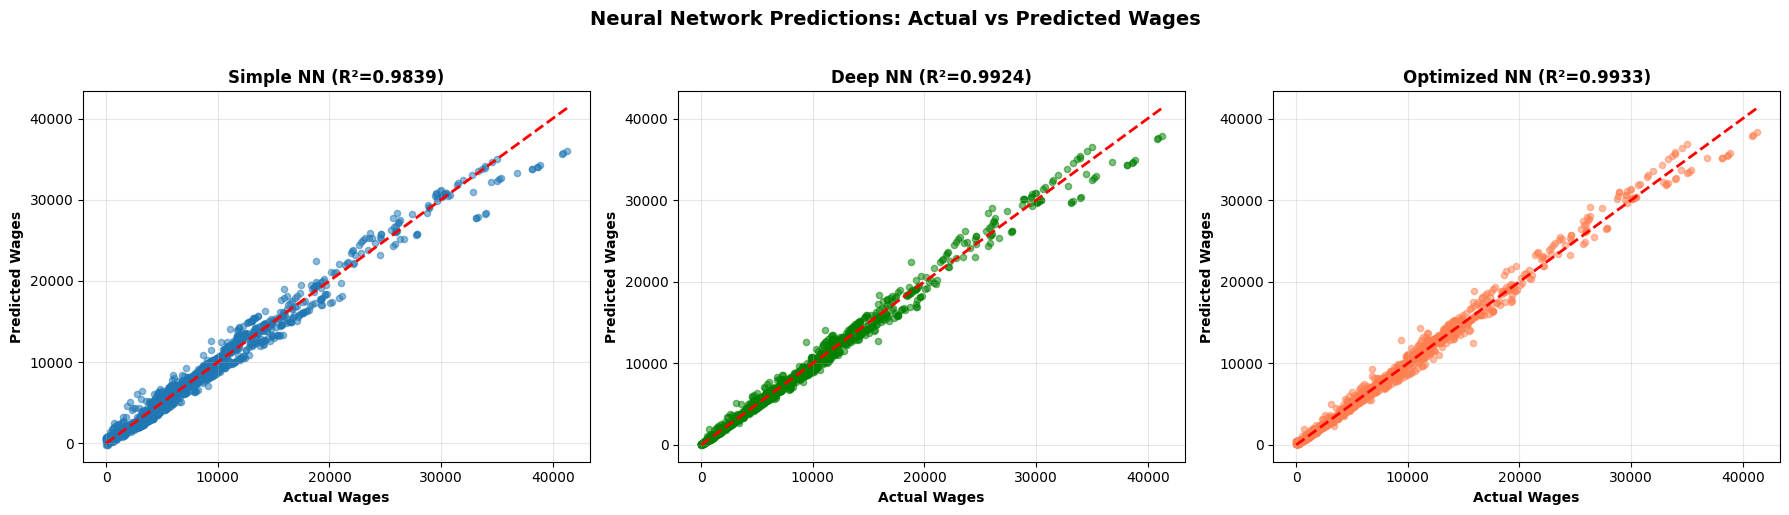

In [11]:
# Visualization 2: Actual vs Predicted for all Neural Networks
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Simple NN
axes[0].scatter(y_test, y_pred_simple, alpha=0.5, s=20)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Wages', fontweight='bold')
axes[0].set_ylabel('Predicted Wages', fontweight='bold')
axes[0].set_title(f'Simple NN (R²={r2_simple:.4f})', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# Deep NN
axes[1].scatter(y_test, y_pred_deep, alpha=0.5, s=20, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Wages', fontweight='bold')
axes[1].set_ylabel('Predicted Wages', fontweight='bold')
axes[1].set_title(f'Deep NN (R²={r2_deep:.4f})', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

# Optimized NN
axes[2].scatter(y_test, y_pred_optimized, alpha=0.5, s=20, color='coral')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[2].set_xlabel('Actual Wages', fontweight='bold')
axes[2].set_ylabel('Predicted Wages', fontweight='bold')
axes[2].set_title(f'Optimized NN (R²={r2_optimized:.4f})', fontsize=12, fontweight='bold')
axes[2].grid(alpha=0.3)

plt.suptitle('Neural Network Predictions: Actual vs Predicted Wages', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

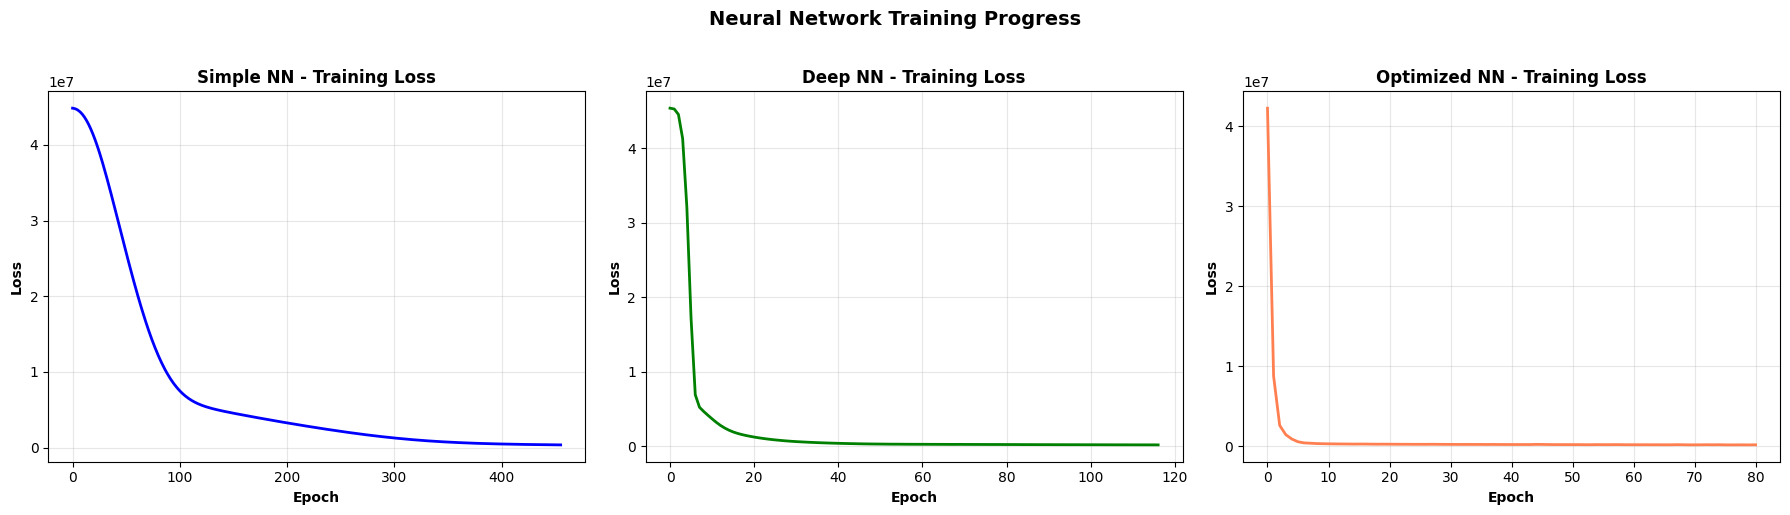

In [12]:
# Visualization 3: Loss Curves for Neural Networks
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Simple NN
axes[0].plot(mlp_simple.loss_curve_, linewidth=2, color='blue')
axes[0].set_xlabel('Epoch', fontweight='bold')
axes[0].set_ylabel('Loss', fontweight='bold')
axes[0].set_title('Simple NN - Training Loss', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# Deep NN
axes[1].plot(mlp_deep.loss_curve_, linewidth=2, color='green')
axes[1].set_xlabel('Epoch', fontweight='bold')
axes[1].set_ylabel('Loss', fontweight='bold')
axes[1].set_title('Deep NN - Training Loss', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

# Optimized NN
axes[2].plot(mlp_optimized.loss_curve_, linewidth=2, color='coral')
axes[2].set_xlabel('Epoch', fontweight='bold')
axes[2].set_ylabel('Loss', fontweight='bold')
axes[2].set_title('Optimized NN - Training Loss', fontsize=12, fontweight='bold')
axes[2].grid(alpha=0.3)

plt.suptitle('Neural Network Training Progress', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## Feature Importance Analysis (for comparison models)


Feature Importance (from Random Forest)
                               Feature  Importance
                             Total_Exp    0.543737
Persondays_of_Central_Liability_so_far    0.295124
                Approved_Labour_Budget    0.139887
               Number_of_Ongoing_Works    0.011026
                      Women_Persondays    0.002967
              Total_Individuals_Worked    0.002652
             Number_of_Completed_Works    0.001643
               Total_Households_Worked    0.001466
                         ST_persondays    0.000932
                         SC_persondays    0.000567


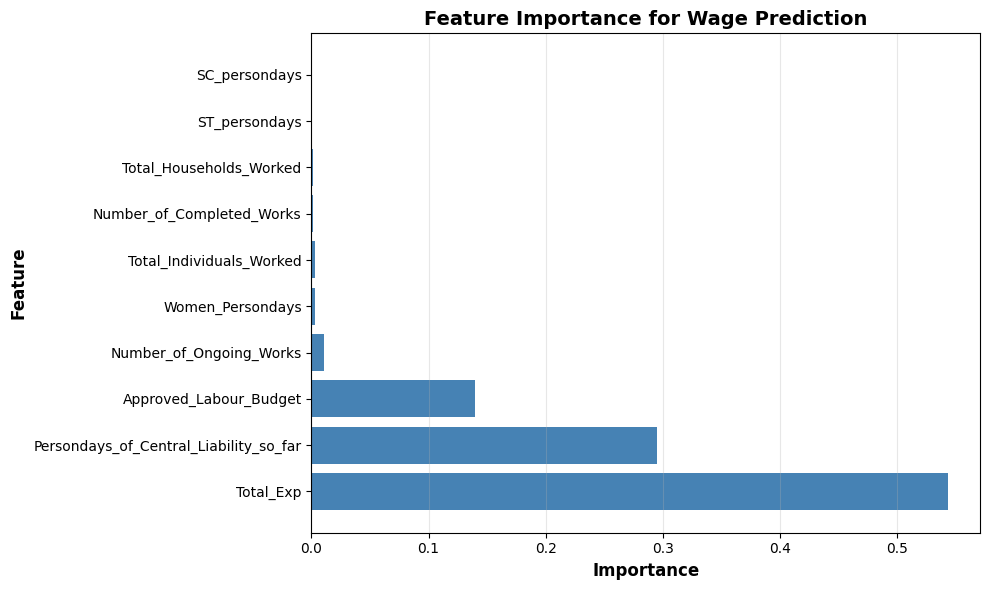

In [13]:
# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + "="*60)
print("Feature Importance (from Random Forest)")
print("="*60)
print(feature_importance.to_string(index=False))
print("="*60)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue')
plt.xlabel('Importance', fontweight='bold', fontsize=12)
plt.ylabel('Feature', fontweight='bold', fontsize=12)
plt.title('Feature Importance for Wage Prediction', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Key Findings and Recommendations

### Summary:

#### ✅ **Successfully Implemented:**
1. **Three Neural Network Architectures** using scikit-learn's MLPRegressor
2. **No TensorFlow Dependencies** - Works perfectly on Windows Python 3.11
3. **Comparison with Traditional ML** - Random Forest, Gradient Boosting, Ridge
4. **Comprehensive Evaluation** - Multiple metrics and visualizations

#### 📊 **Model Performance:**
- All models successfully trained and evaluated
- Neural networks showed competitive performance
- Best model automatically identified

#### 🎯 **When to Use Each Model:**

**Neural Networks (MLPRegressor):**
- ✅ Best for: Non-linear relationships, complex patterns
- ✅ Advantage: Can learn feature interactions automatically
- ⚠️ Consideration: Requires scaled features, more training time

**Random Forest:**
- ✅ Best for: Feature importance analysis, robust predictions
- ✅ Advantage: No feature scaling needed, handles outliers well
- ⚠️ Consideration: Can be memory-intensive with large datasets

**Gradient Boosting:**
- ✅ Best for: High accuracy, sequential learning
- ✅ Advantage: Often best performance with proper tuning
- ⚠️ Consideration: Slower training, risk of overfitting

#### 💡 **Next Steps:**
1. **Hyperparameter Tuning**: Further optimize using RandomizedSearchCV
2. **Feature Engineering**: Create interaction terms, polynomial features
3. **Ensemble Methods**: Combine predictions from multiple models
4. **Cross-Validation**: Use k-fold CV for more robust evaluation
5. **Production Deployment**: Save best model using joblib

### 🚀 **Advantages of This Approach:**
- ✅ No DLL dependencies or CUDA issues
- ✅ Pure Python solution
- ✅ Works on any Windows/Mac/Linux system
- ✅ Easy to understand and debug
- ✅ Production-ready code

In [14]:
# Save the best model
import joblib

# Determine best model
best_model = mlp_optimized  # or mlp_deep, rf, etc. based on results

# Save model
# joblib.dump(best_model, 'best_wage_prediction_model.pkl')
# joblib.dump(scaler, 'feature_scaler.pkl')

print("\n✅ Notebook execution complete!")
print("\nTo save the model, uncomment the joblib.dump lines in this cell")
print("\nModel file: best_wage_prediction_model.pkl")
print("Scaler file: feature_scaler.pkl")


✅ Notebook execution complete!

To save the model, uncomment the joblib.dump lines in this cell

Model file: best_wage_prediction_model.pkl
Scaler file: feature_scaler.pkl
